In [1]:
import requests, re, string
!pip install beautifulsoup4
from bs4 import BeautifulSoup
from tabulate import tabulate

# Antoloji.com Page Scraping

https://www.antoloji.com/ consists of hundreds of pets and thousands of poems information.

This work intents to scrape the website using Python's BeautifulSoup library for educational purposes.

2 levels of scraping is carried out. First is to obtain the poet names and second is to get poems of those poets.

# 1) Poets Listing Page

**poetsListUrl** is the main page that lists Poet names in a paginated form.

An html representation of the page is obtained with the help of requests library

### * Retrieve Poet Names

By observing the page's HTML structure, one can see that there is a 'ul' element with class name **'pd-text-mini'** that contains all the Poet table.

Simply scrape that part and read all the list items (li) in it.

### * Where to stop scraping poets?

There is a pagination component at to bottom of the page identified by class name **'pagination'**

Idea is to scrape that part and compare the greatest page id with current page id

**getGreatestPageId** function returns either '...' or current page number or larger number

Use **hasMore** function to continue paging

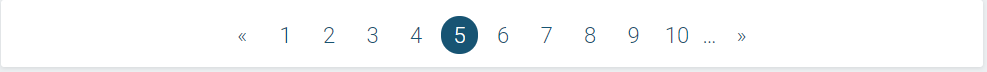

In [2]:
poetsListUrl = "https://www.antoloji.com/populer-sairler/sirala-baslik/sayfa-{0}/"
poetsPersonalUrl = "https://www.antoloji.com/{0}"

In [3]:
def getSoup(url): 
    page = requests.get(url) # Retrieve response html
    soup = BeautifulSoup(page.content, 'html.parser') # Create the soup
    return soup

In [4]:
def getGreatestPageId(soup):
    paginationUl = soup.find_all('ul', class_='pagination')
    if(not paginationUl):
        return -1
    paginationListItems = paginationUl[0].find_all('li')
    lastIndex = -2
    while(True):
        greatestPageId = paginationListItems[lastIndex].text
        if(not greatestPageId.isdigit()):
            lastIndex -= 1
        else:
            break
    return greatestPageId

In [5]:
def hasMore(currentPageId, maxPageId):
    return (not maxPageId == -1) and maxPageId.isdigit() and currentPageId < int(maxPageId)

In [6]:
# Scrape unordered list and get li items
def getPoetNames(poets):
    poet_names = []
    poetsSoup = poets[0].find_all('li')
    for poet in poetsSoup:
        poet_name = poet.find('h4').text
        poet_names.append(poet_name)
    return poet_names

In [7]:
pageId = 1
poet_names_collection = []
while(True):    
    url = poetsListUrl.format(pageId)
    soup = getSoup(url)
    greatestId = getGreatestPageId(soup) # Obtain the last page id
    poets = soup.find_all('ul', class_='pd-text-mini') # Unordered list of poet items
    poet_names = getPoetNames(poets)
    poet_names_collection.extend(poet_names)
    b = "Scraping page %i is complete " % pageId
    print (b, end="\r")
    pageId += 1
    if(not hasMore(pageId, greatestId)):
        break

In [8]:
print('There are {0} number of poets. From \'{1}\' to \'{2}\''.format(len(poet_names_collection), poet_names_collection[0], poet_names_collection[-1]))

There are 450 number of poets. From 'A. Hicri İzgören' to 'Ziya Gökalp'


In [9]:
turkish_lower_normalize = {
    ord(u'İ'): u'i',
    ord(u'Ü'): u'u',
    ord(u'Ö'): u'o',
    ord(u'ı'): u'i',
    ord(u'ö'): u'o',
    ord(u'ü'): u'u',
    ord(u'Ç'): u'c',
    ord(u'Ğ'): u'g',
    ord(u'ğ'): u'g',
    ord(u'Ş'): u's',
    ord(u'ş'): u's',
    ord(u'ç'): u'c',
    ord(u'â'): u'a',
    ord(u'û'): u'u',
}

table = []
for name in poet_names_collection:
    name_normalized = name.translate(turkish_lower_normalize).lower() # Translate Turkish characters
    name_cleaned = re.sub('[^a-z]', ' ', name_normalized) # Remove non letter characters
    name_reconstructed = "-".join(name_cleaned.split()) # Change consecutive spaces to dash 
    table.append([name, name_normalized, name_cleaned, name_reconstructed])

### Observe the Name Processing

First operation is to convert Turkish specific characters to English equivalent

Secondly, non-letter characters are replaced with blank space

Last operation is to split spaces and put dashes in between words.

In [10]:
bold_ascii = '\033[1m'
escape_bold_ascii = '\033[0m'
print(tabulate(table[:20], headers=[bold_ascii + 'Original', 'Turkish-to-English Translate', 'Remove Non-letters', 'Poet Extension' + escape_bold_ascii]))

Original                         Turkish-to-English Translate     Remove Non-letters              Poet Extension
-------------------------------  -------------------------------  ------------------------------  ----------------------------
A. Hicri İzgören                 a. hicri izgoren                 a  hicri izgoren                a-hicri-izgoren
A. Kadir (Abdülkadir Meriçboyu)  a. kadir (abdulkadir mericboyu)  a  kadir  abdulkadir mericboyu  a-kadir-abdulkadir-mericboyu
A. Kadir Bilgin                  a. kadir bilgin                  a  kadir bilgin                 a-kadir-bilgin
Abdullah Tukay                   abdullah tukay                   abdullah tukay                  abdullah-tukay
Abdurrahim Karakoç               abdurrahim karakoc               abdurrahim karakoc              abdurrahim-karakoc
Abdülhak Hamit Tarhan            abdulhak hamit tarhan            abdulhak hamit tarhan           abdulhak-hamit-tarhan
Abdülkadir Budak                 abdulkadir budak       

In [11]:
print(bold_ascii + 'Example 20 URLs to fetch poems\n')
for poet in table[:20]:
    print(poetsPersonalUrl.format(poet[-1]))

Example 20 URLs to fetch poems

https://www.antoloji.com/a-hicri-izgoren
https://www.antoloji.com/a-kadir-abdulkadir-mericboyu
https://www.antoloji.com/a-kadir-bilgin
https://www.antoloji.com/abdullah-tukay
https://www.antoloji.com/abdurrahim-karakoc
https://www.antoloji.com/abdulhak-hamit-tarhan
https://www.antoloji.com/abdulkadir-budak
https://www.antoloji.com/abdulkadir-bulut
https://www.antoloji.com/adnan-azar
https://www.antoloji.com/adnan-ozer
https://www.antoloji.com/adnan-satici
https://www.antoloji.com/adnan-yucel
https://www.antoloji.com/adonis
https://www.antoloji.com/afsar-timucin
https://www.antoloji.com/agah
https://www.antoloji.com/ahmed-arif
https://www.antoloji.com/ahmed-pasa
https://www.antoloji.com/ahmed-samlu
https://www.antoloji.com/ahmedi
https://www.antoloji.com/ahmet-ada


# 2) Poet Information Retrieval

**poetsPersonalUrl** is the personal page of Poets

In [12]:
class Poem:
    def __init__(self, title, link, date):
        self.title = title
        self.date = date
        self.link = link
    def __str__(self):
        return self.title + " " + self.link + " " +self.date

In [31]:
poemUrl = 'https://www.antoloji.com/{0}/siirleri/ara-/sirala-/sayfa-{1}/'

poemCollection = {}
for row in table[:10]:
    pageId = 1
    poet_extension = row[-1]
    poemCollection[poet_extension] = []
    print('Retrieving %s' % poet_extension)
    
    while(True): # Retrieve all poems by paginating
        try:
            url = poemUrl.format(poet_extension, pageId)
            soup = getSoup(url)
            poems = soup.find_all('div', class_='poem-detail')[0].find_all('li') # Unordered list of poet items
            for poemInfo in poems:
                poem_date = poemInfo.find('p').text
                poemAnchor = poemInfo.find_all('a')[-1]
                poem_link_extension, poem_title = poemAnchor["href"], poemAnchor["title"]
                poem = Poem(poem_title, poem_link_extension, poem_date)
                poemCollection[poet_extension].append(poem)
            greatestPageId = getGreatestPageId(soup) # Obtain the last page id
            if(not hasMore(pageId, greatestPageId)):
                break
            pageId += 1
        except Exception:
            poemCollection.pop(poet_extension)
            break
        

Retrieving a-hicri-izgoren
Retrieving a-kadir-abdulkadir-mericboyu
Retrieving a-kadir-bilgin
Retrieving abdullah-tukay
Retrieving abdurrahim-karakoc
Retrieving abdulhak-hamit-tarhan
Retrieving abdulkadir-budak
Retrieving abdulkadir-bulut
Retrieving adnan-azar
Retrieving adnan-ozer
